In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# **1. Загрузка данных**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #Загружаем данные из exlcel, уберём колонку с индексом
X_bp_data = pd.read_excel('/content/drive/MyDrive/X_bp.xlsx', index_col=0)
X_nup_data = pd.read_excel('/content/drive/MyDrive/X_nup.xlsx', index_col=0)

In [ ]:
 #Загружаем данные из exlcel, уберём колонку с индексом
X_bp_data = pd.read_excel('/content/drive/MyDrive/X_bp.xlsx', index_col=0)
X_nup_data = pd.read_excel('/content/drive/MyDrive/X_nup.xlsx', index_col=0)

In [ ]:
#Преобразуем в DataFrame для дальнейшего использования
X_bp_data_df = pd.DataFrame(X_bp_data)
X_nup_data_df = pd.DataFrame(X_nup_data)

In [ ]:
 # Для удобства выведим в одну строчку
print (X_bp_data_df.head(5).to_string())

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  Температура вспышки, С_2  Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  Потребление смолы, г/м2
0                         1.857143            2030.0             738.736842                        30.00                        22.267857                100.000000                          210.0                                  70.0                         3000.0                    220.0
1                         1.857143            2030.0             738.736842                        50.00                        23.750000                284.615385                          210.0                                  70.0                         3000.0                    220.0
2                         1.857143            2030.0             738.736842                        49.90                        33.00

In [ ]:
 print (X_bp_data_df.shape, X_nup_data_df.shape)#После объединения таблиц должны получить размерность (1023, 13)

(1023, 10) (1040, 3)


In [ ]:
 #Объединение по индексу, тип объединения INNER
df = X_bp_data_df.merge(X_nup_data_df, how='inner', left_index = True, right_index = True)

In [ ]:
 #Посмотрим размерность полученного DS
print(df.shape)

(1023, 13)


In [ ]:
 #Посмотрим с каким типом переменных нам предстоит работать.
#Все переменные являются количественными (тип float), признаков с типом "object" нет - значит нет строковых значений.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [ ]:
# Проверяем на пропуски
# Пропусков нет
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
# Посмотрим описательную статистику
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Мы видим количество наблюдений (count), среднее арифметическое (mean), среднее квадратическое отклонение (std), минимальное (min) и максимальное (max) значения, а также первый (25%), второй (50%) и третий (75%) квартиль (второй квартиль это то же самое, что медиана) каждой количественной переменной.

# **2. Исследовательский анализ данных**
Выполним исследовательский или разведочный анализ данных (Exploratory Data Analysis, EDA)

Сильная корреляция, когда значение приближается к 1 или −1, и ее отсутствии, когда значение близко к нулю.

In [ ]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

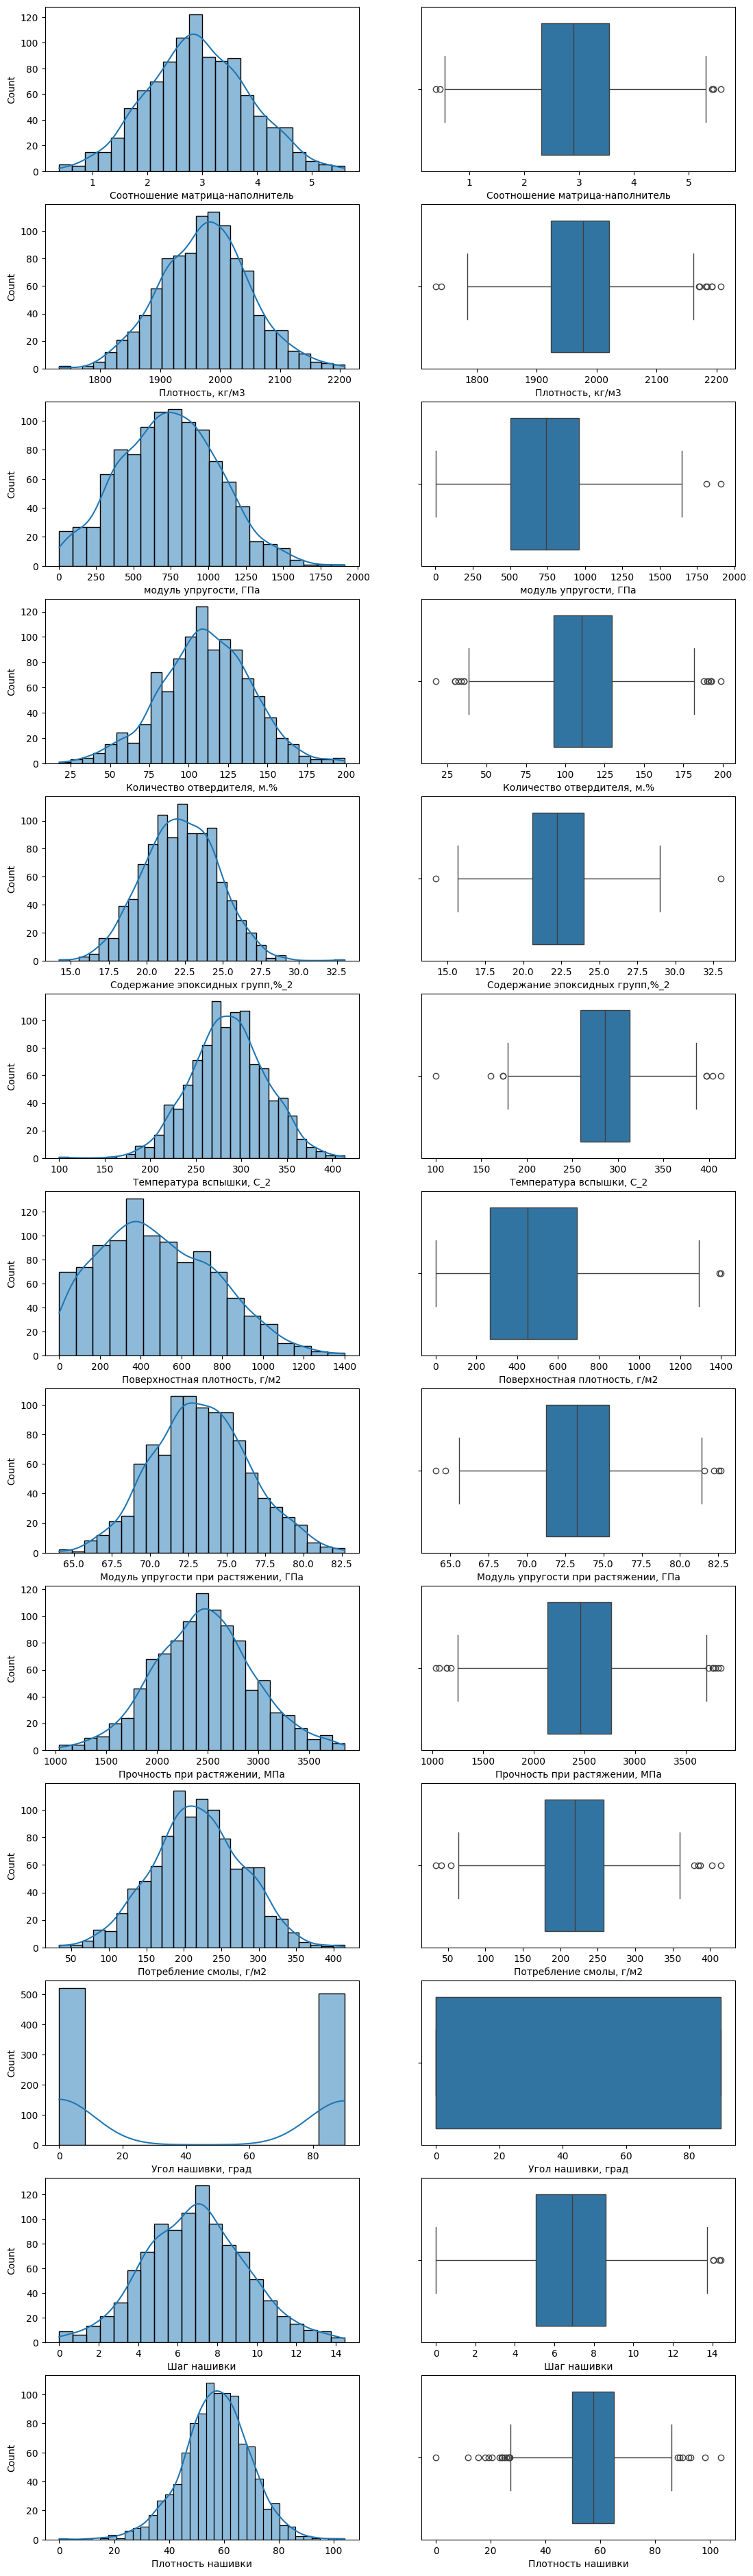

In [ ]:
# Построю графики распределения переменных и "ящики с усами"
#Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.
#"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

<Axes: >

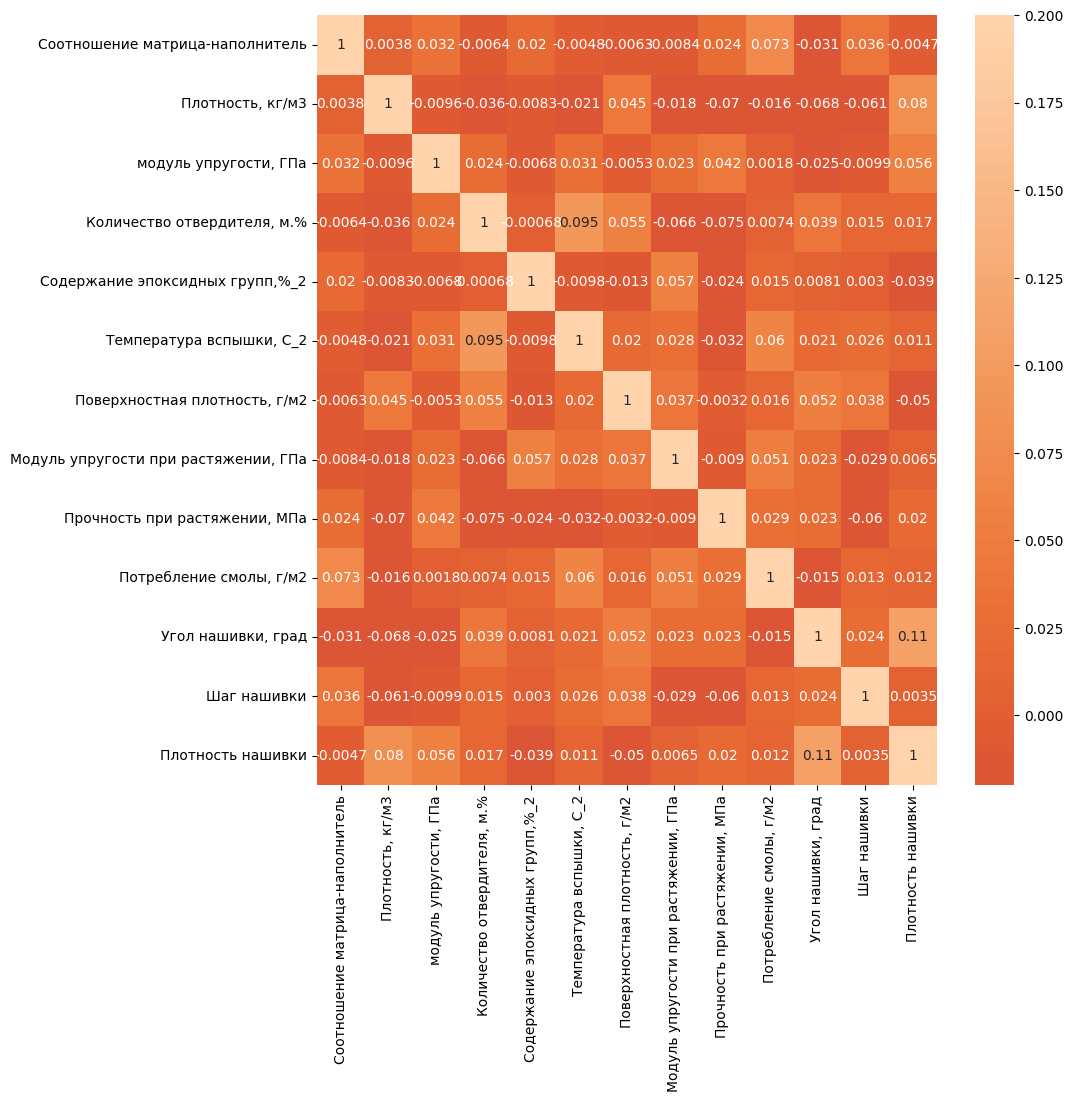

In [ ]:
#Отобразим тепловую карту Пирсона
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, vmin=-0.02, vmax=0.2, center= -0.4)

In [ ]:
#Построим график рассеяния
#видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.
sns.pairplot(df, height=2)

Output hidden; open in https://colab.research.google.com to view.

# **Очистим данные от выбросов**

In [ ]:
#Воспользуемся методом перцентиля (numpy.percentile)
for col in df.columns:
    q25,q75 = np.percentile(df.loc[:,col],[25,75])
    iqr = q75-q25
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

#Заменяем нулевыми значениями
    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

#Смотрим результат
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [ ]:
#Удаляем нулевые значения
df = df.dropna(axis = 0)
#Результат
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки            

In [ ]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,46.057692,6.915585,57.451895
std,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255,45.011619,2.509672,11.239331
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698,0.000000,0.037639,27.272928
25%,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091,0.000000,5.134988,50.209656
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,90.000000,6.943337,57.584225
75%,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777,90.000000,8.591450,64.798211
max,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220,90.000000,13.732404,86.012427


# **Нормализуем данные**

In [ ]:
# Нормальзуем значения с помощью метода MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.289334,0.557156
3,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.335840
4,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.506083
5,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.557156
6,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.727399


# **Графики после нормализации и исключения выбросов**

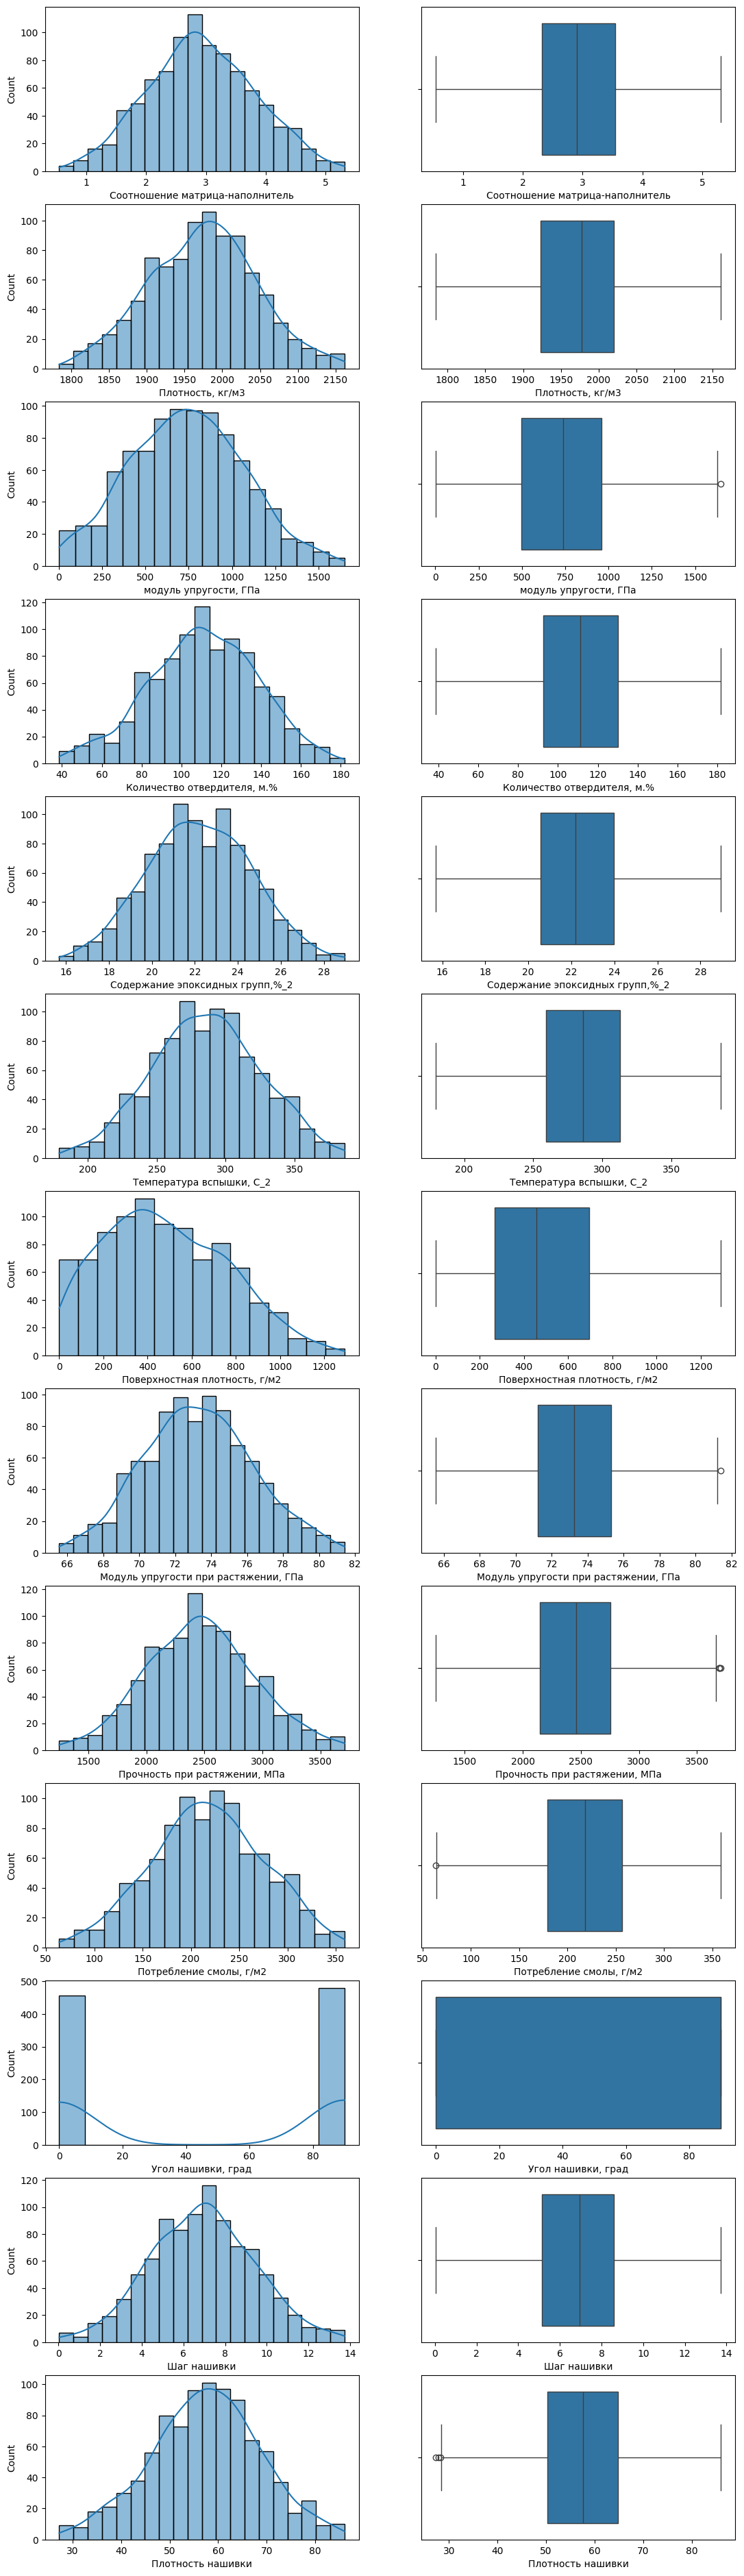

In [ ]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df_norm.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

# **Корреляционная тепловая карта Пирсона после нормализации и исключения выбросов**

<Axes: >

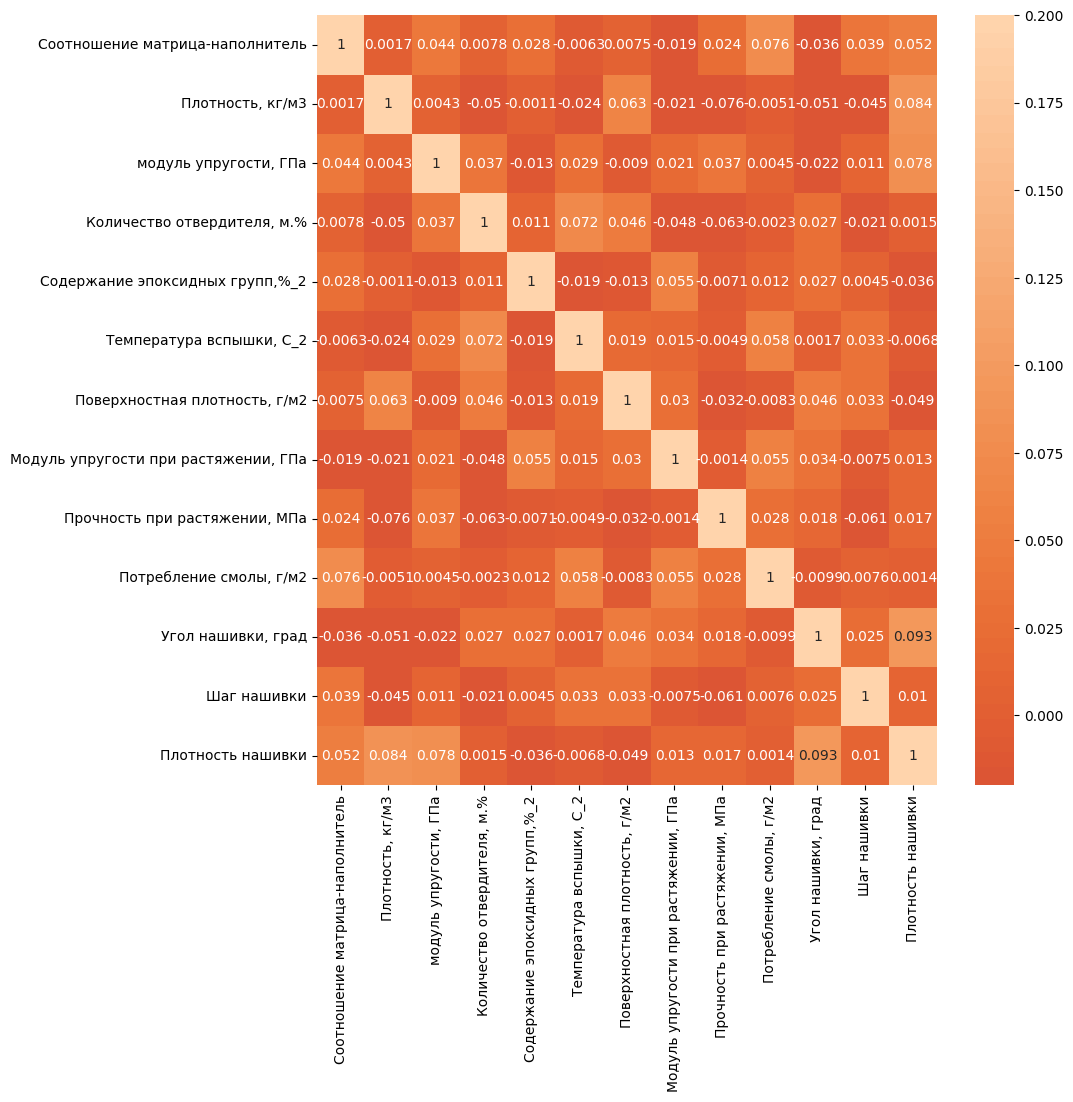

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_norm.corr(), annot = True, vmin=-0.02, vmax=0.2, center= -0.4)

# **Попарные графики рассеяния точек после нормализации и исключения выбросов**

In [ ]:
sns.pairplot(df_norm, height=3)

Output hidden; open in https://colab.research.google.com to view.

# **Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении**

*  Провести предобработку данных.
*  Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
*  30% данных оставить на тестирование модели, на остальных происходит обучение моделей.
*   При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
*   Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.


In [ ]:
#Построение моделей для прогноза модуля упругости при растяжении и прочности при растяжении
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression # SGDRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [ ]:
#Разбиваем данные на обучающую и тестовую выборки
x_mod = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_mod = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(x_mod, y_mod, test_size=0.3, random_state=42)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=42)

# **Строим модели**
# **KNeighborsRegressor**

In [51]:
knn = KNeighborsRegressor()
knn.fit(X_train_mod, y_train_mod)

y_pred_mod = knn.predict(X_test_mod)

model_mae_knn_mod = mean_absolute_error(y_test_mod, y_pred_mod)
print("MAE:", mae)
model_mse_knn_mod = mean_squared_error(y_test_mod, y_pred_mod)
print("MSE:", mse)
model_r2_knn_mod = r2_score(y_test_mod, y_pred_mod)
print("R2:", r2)




MAE: 363.1440684032817
MSE: 213699.14586333025
R2: -0.04699890994313649


In [ ]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
#Для пронгоза модуля упругости при растяжении
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # количество соседей
    'weights': ['uniform', 'distance'],  # веса для соседей
    'metric': ['euclidean', 'manhattan']  # метрики расстояния
}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_mod, y_train_mod)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка MSE:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_mod_best = best_model.predict(X_test_mod)


mae_best = mean_absolute_error(y_test_mod, y_pred_mod_best)
print("MAE для лучшей модели:", mae_best)
mse_best = mean_squared_error(y_test_mod, y_pred_mod_best)
print("MSE для лучшей модели:", mse_best)
r2_best = r2_score(y_test_mod, y_pred_mod_best)
print("R2 для лучшей модели:", r2_best)


Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Лучшая оценка MSE: -10.064052416722383
MAE для лучшей модели: 2.5148360845339854
MSE для лучшей модели: 9.775720116966058
R2 для лучшей модели: -0.12181170165570965


In [54]:
knn = KNeighborsRegressor()
knn.fit(X_train_pr,y_train_pr)

y_pred_pr = knn.predict(X_test_pr)

model_mae_knn_pr = mean_absolute_error(y_test_pr, y_pred_pr)
print("MAE:", mae)
model_mse_knn_pr = mean_squared_error(y_test_pr, y_pred_pr)
print("MSE:", mse)
model_r2_knn_pr = r2_score(y_test_pr, y_pred_pr)
print("R2:", r2)

MAE: 363.1440684032817
MSE: 213699.14586333025
R2: -0.04699890994313649


In [ ]:
#Для прогноза прочности при растяжении
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # количество соседей
    'weights': ['uniform', 'distance'],  # Различные веса для соседей
    'metric': ['euclidean', 'manhattan']  # Различные метрики расстояния
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pr,y_train_pr)


print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка MSE:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_pr_best = best_model.predict(X_test_pr)


mae_best = mean_absolute_error(y_test_pr, y_pred_pr_best)
print("MAE для лучшей модели:", mae_best)
mse_best = mean_squared_error(y_test_pr, y_pred_pr_best)
print("MSE для лучшей модели:", mse_best)
r2_best = r2_score(y_test_pr, y_pred_pr_best)
print("R2 для лучшей модели:", r2_best)

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Лучшая оценка MSE: -235151.10125945555
MAE для лучшей модели: 374.20261220993876
MSE для лучшей модели: 217920.50148124262
R2 для лучшей модели: -0.0676810456277741


# **GradientBoostingRegressor**

In [47]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train_mod, y_train_mod)


y_pred_mod_gb = gb_regressor.predict(X_test_mod)


model_mae_gb_mod = mean_absolute_error(y_test_mod, y_pred_mod_gb)
print("MAE (Gradient Boosting):", mae_gb)
model_mse_gb_mod = mean_squared_error(y_test_mod, y_pred_mod_gb)
print("MSE (Gradient Boosting):", mse_gb)
model_r2_gb_mod = r2_score(y_test_mod, y_pred_mod_gb)
print("R2 (Gradient Boosting):", r2_gb)

MAE (Gradient Boosting): 381.6445178543374
MSE (Gradient Boosting): 228625.10579922033
R2 (Gradient Boosting): -0.12012724987916146


In [53]:
gb_regressor = GradientBoostingRegressor()

gb_regressor.fit(X_train_pr, y_train_pr)

y_pred_pr_gb = gb_regressor.predict(X_test_pr)


model_mae_gb_pr = mean_absolute_error(y_test_pr, y_pred_pr_gb)
print("MAE (Gradient Boosting):", mae_gb)

model_mse_gb_pr = mean_squared_error(y_test_pr, y_pred_pr_gb)
print("MSE (Gradient Boosting):", mse_gb)

model_r2_gb_pr = r2_score(y_test_pr, y_pred_pr_gb)
print("R2 (Gradient Boosting):", r2_gb)

MAE (Gradient Boosting): 381.6445178543374
MSE (Gradient Boosting): 228625.10579922033
R2 (Gradient Boosting): -0.12012724987916146


In [ ]:
#Для пронгоза модуля упругости при растяжении
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}


gb_regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_mod, y_train_mod)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_gb_model = grid_search.best_estimator_

y_pred_mod_gb_best = best_gb_model.predict(X_test_mod)


mae_gb_best = mean_absolute_error(y_test_mod, y_pred_mod_gb_best)
print("MAE (Gradient Boosting, best model):", mae_gb_best)
mse_gb_best = mean_squared_error(y_test_mod, y_pred_mod_gb_best)
print("MSE (Gradient Boosting, best model):", mse_gb_best)
r2_gb_best = r2_score(y_test_mod, y_pred_mod_gb_best)
print("R2 (Gradient Boosting, best model):", r2_gb_best)

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
MAE (Gradient Boosting, best model): 2.4000461877099326
MSE (Gradient Boosting, best model): 8.729812707823816
R2 (Gradient Boosting, best model): -0.0017887103685660932


In [ ]:
#Для прогноза прочности при растяжении
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}


gb_regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pr, y_train_pr)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_gb_model = grid_search.best_estimator_

y_pred_pr_gb_best = best_gb_model.predict(X_test_pr)


mae_gb_best = mean_absolute_error(y_test_pr, y_pred_pr_gb_best)
print("MAE (Gradient Boosting, best model):", mae_gb_best)
mse_gb_best = mean_squared_error(y_test_pr, y_pred_pr_gb_best)
print("MSE (Gradient Boosting, best model):", mse_gb_best)
r2_gb_best = r2_score(y_test_mod, y_pred_pr_gb_best)
print("R2 (Gradient Boosting, best model):", r2_gb_best)

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
MAE (Gradient Boosting, best model): 365.03394214633715
MSE (Gradient Boosting, best model): 211517.05064345463
R2 (Gradient Boosting, best model): -646728.2084012744


# **LinearRegression**

In [58]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_mod, y_train_mod)

y_pred_mod = linear_reg.predict(X_test_mod)


model_mae_lr_mod = mean_absolute_error(y_test_mod, y_pred_mod)
print("MAE:", mae)
model_mse_lr_mod = mean_squared_error(y_test_mod, y_pred_mod)
print("MSE:", mse)
model_r2_lr_mod = r2_score(y_test_mod, y_pred_mod)
print("R2:", r2)


MAE: 363.1440684032817
MSE: 213699.14586333025
R2: -0.04699890994313649


In [57]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_pr, y_train_pr)

y_pred_pr = linear_reg.predict(X_test_pr)


model_mae_lr_pr = mean_absolute_error(y_test_pr, y_pred_pr)
print("MAE:", mae)
model_mse_lr_pr = mean_squared_error(y_test_pr, y_pred_pr)
print("MSE:", mse)
model_r2_lr_pr = r2_score(y_test_pr, y_pred_pr)
print("R2:", r2)

MAE: 363.1440684032817
MSE: 213699.14586333025
R2: -0.04699890994313649


In [ ]:
#Для пронгоза модуля упругости при растяжении
param_grid = {
    'fit_intercept': [True, False]
}
linear_reg = LinearRegression()
grid_search = GridSearchCV(linear_reg, param_grid, cv=10)
grid_search.fit(X_train_mod, y_train_mod)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_mod = best_model.predict(X_test_mod)

mae = mean_absolute_error(y_test_mod, y_pred_mod)
print("MAE:", mae)
mse = mean_squared_error(y_test_mod, y_pred_mod)
print("MSE:", mse)
r2 = r2_score(y_test_mod, y_pred_mod)
print("R2:", r2)


Best Parameters: {'fit_intercept': True}
MAE: 2.4145733303816472
MSE: 8.759731042865322
R2: -0.0052219856610293824


In [ ]:
#Для прогноза прочности при растяжении
param_grid = {
    'fit_intercept': [True, False]
}
linear_reg = LinearRegression()
grid_search = GridSearchCV(linear_reg, param_grid, cv=10)
grid_search.fit(X_train_pr, y_train_pr)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_pr = best_model.predict(X_test_pr)

mae = mean_absolute_error(y_test_pr, y_pred_pr)
print("MAE:", mae)
mse = mean_squared_error(y_test_pr, y_pred_pr)
print("MSE:", mse)
r2 = r2_score(y_test_pr, y_pred_pr)
print("R2:", r2)

Best Parameters: {'fit_intercept': True}
MAE: 363.1440684032817
MSE: 213699.14586333025
R2: -0.04699890994313649


# **RandomForestRegressor**

In [48]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train_mod, y_train_mod)

y_pred_mod_rf = rf_regressor.predict(X_test_mod)

model_mae_rf_mod = mean_absolute_error(y_test_mod, y_pred_mod_rf)
print("MAE (Random Forest):", mae_rf)
model_mse_rf_mod = mean_squared_error(y_test_mod, y_pred_mod_rf)
print("MSE (Random Forest):", mse_rf)
model_r2_rf_mod = r2_score(y_test_mod, y_pred_mod_rf)
print("R2 (Random Forest):", r2_rf)

MAE (Random Forest): 371.56957409424655
MSE (Random Forest): 219442.44308265642
R2 (Random Forest): -0.07513765567289088


In [56]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train_pr, y_train_pr)

y_pred_pr_rf = rf_regressor.predict(X_test_pr)

model_mae_rf_pr = mean_absolute_error(y_test_pr, y_pred_pr_rf)
print("MAE (R_pandom Forest):", mae_rf)
model_mse_rf_pr = mean_squared_error(y_test_pr, y_pred_pr_rf)
print("MSE (Random Forest):", mse_rf)
model_r2_rf_pr = r2_score(y_test_pr, y_pred_pr_rf)
print("R2 (Random Forest):", r2_rf)

MAE (R_pandom Forest): 371.56957409424655
MSE (Random Forest): 219442.44308265642
R2 (Random Forest): -0.07513765567289088


In [ ]:
#Для пронгоза модуля упругости при растяжении
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10)


grid_search.fit(X_train_mod, y_train_mod)
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)


best_rf_model = grid_search.best_estimator_
y_pred_mod_rf_best = best_rf_model.predict(X_test_mod)


mae_rf_best = mean_absolute_error(y_test_mod, y_pred_mod_rf_best)
print("MAE (Random Forest, best model):", mae_rf_best)
mse_rf_best = mean_squared_error(y_test_mod, y_pred_mod_rf_best)
print("MSE (Random Forest, best model):", mse_rf_best)
r2_rf_best = r2_score(y_test_mod, y_pred_mod_rf_best)
print("R2 (Random Forest, best model):", r2_rf_best)


Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
MAE (Random Forest, best model): 2.4208992492553123
MSE (Random Forest, best model): 8.89708610774657
R2 (Random Forest, best model): -0.020984151232652293


In [ ]:
#Для прогноза прочности при растяжении
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10)


grid_search.fit(X_train_pr, y_train_pr)
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)


best_rf_model = grid_search.best_estimator_
y_pred_pr_rf_best = best_rf_model.predict(X_test_pr)


mae_rf_best = mean_absolute_error(y_test_pr, y_pred_pr_rf_best)
print("MAE (Random Forest, best model):", mae_rf_best)
mse_rf_best = mean_squared_error(y_test_pr, y_pred_pr_rf_best)
print("MSE (Random Forest, best model):", mse_rf_best)
r2_rf_best = r2_score(y_test_pr, y_pred_pr_rf_best)
print("R2 (Random Forest, best model):", r2_rf_best)


Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MAE (Random Forest, best model): 374.01184217099524
MSE (Random Forest, best model): 220423.1433526702
R2 (Random Forest, best model): -0.07994250460917063


In [61]:
models = pd.DataFrame()
knn_mod = pd.DataFrame({
   'Model': 'KNeighborsRegressor_mod',
   'MAE' : model_mae_knn_mod,
   'R2': model_r2_knn_mod,
   'MSE': model_mse_knn_mod
}, index=['Модуль упругости при растяжении'])

gb_mod = pd.DataFrame({
   'Model': 'GradientBoostingRegressor_mod',
   'MAE': model_mae_gb_mod,
   'R2': model_r2_gb_mod,
   'MSE': model_mse_gb_mod
}, index=['Модуль упругости при растяжении'])

knn_pr = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr',
   'MAE': model_mae_knn_pr,
   'R2': model_r2_knn_pr,
   'MSE': model_mse_knn_pr
}, index=['Прочность при растяжении'])

gb_pr = pd.DataFrame({
   'Model': 'GradientBoostingRegressor_pr',
   'MAE': model_mae_gb_pr,
   'R2': model_r2_gb_pr,
   'MSE': model_mse_gb_pr
}, index=['Прочность при растяжении'])

rf_mod = pd.DataFrame({
   'Model': 'RandomForestRegressor_mod',
   'MAE': model_mae_rf_mod,
   'R2': model_r2_rf_mod,
   'MSE': model_mse_rf_mod
}, index=['Модуль упругости при растяжении'])

lr_mod = pd.DataFrame({
   'Model': 'LinearRegression_mod',
   'MAE': model_mae_lr_mod,
   'R2': model_r2_lr_mod,
   'MSE': model_mse_lr_mod
}, index=['Модуль упругости при растяжении'])


rf_pr = pd.DataFrame({
   'Model': 'RandomForestRegressor_mod',
   'MAE': model_mae_rf_pr,
   'R2': model_r2_rf_pr,
   'MSE': model_mse_rf_pr
   }, index=['Прочность при растяжении'])

lr_pr = pd.DataFrame({
   'Model': 'LinearRegression_mod',
   'MAE': model_mae_lr_pr,
   'R2': model_r2_lr_pr,
   'MSE': model_mse_lr_pr
}, index=['Прочность при растяжении'])


In [62]:
models = pd.concat([models, knn_mod, gb_mod, rf_mod, lr_mod, knn_pr, gb_pr, rf_pr, lr_pr])

In [63]:
models_s= models.sort_values(by=['MAE', 'R2', 'MSE'])
models_s

,Model,MAE,R2,MSE
Модуль упругости при растяжении,LinearRegression_mod,2.414573,-0.005222,8.759731
Модуль упругости при растяжении,RandomForestRegressor_mod,2.420528,-0.024592,8.928530
Модуль упругости при растяжении,GradientBoostingRegressor_mod,2.482254,-0.093819,9.531783
Модуль упругости при растяжении,KNeighborsRegressor_mod,2.595879,-0.246101,10.858807
Прочность при растяжении,LinearRegression_mod,363.144068,-0.046999,213699.145863
Прочность при растяжении,RandomForestRegressor_mod,371.475298,-0.076828,219787.358151
Прочность при растяжении,GradientBoostingRegressor_pr,381.302617,-0.119614,228520.250080
Прочность при растяжении,KNeighborsRegressor_pr,389.496464,-0.135135,231688.348301


Text(0.5, 1.0, 'Средняя абсолютная ошибка МАЕ моделей прогноза для модуля упругости при растяжении')

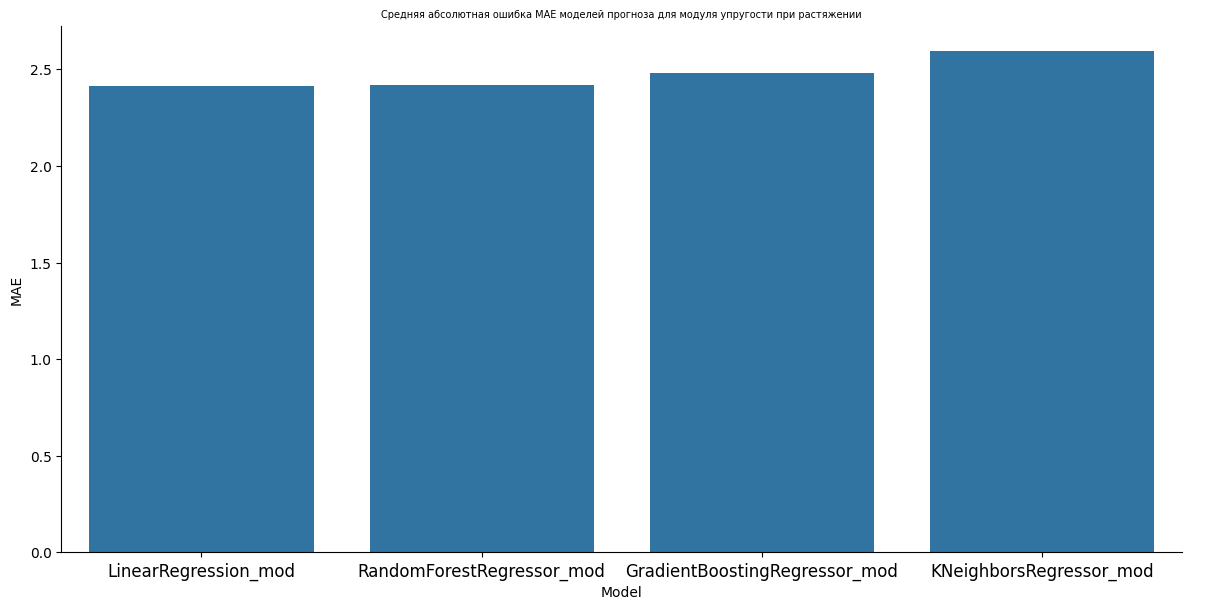

In [64]:
sns.catplot(data=models_s[0:4], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка МАЕ моделей прогноза для модуля упругости при растяжении', size=7)

Text(0.5, 1.0, 'Средняя абсолютная ошибка МАЕ моделей прогноза для прочности при растяжении')

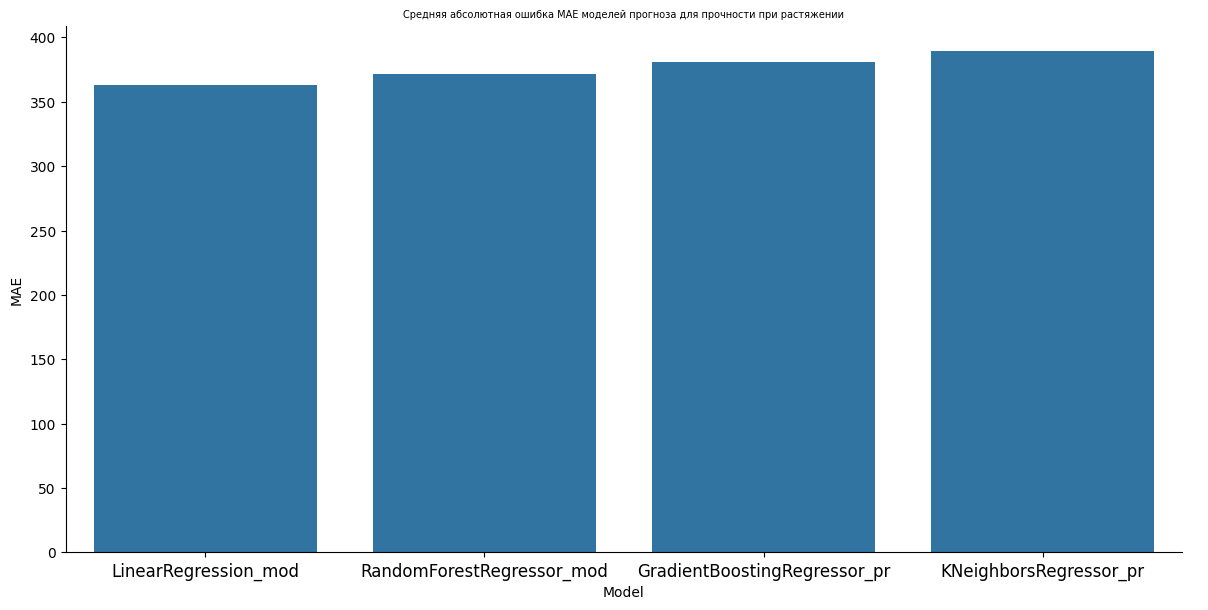

In [65]:

sns.catplot(data=models_s[4:9], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка МАЕ моделей прогноза для прочности при растяжении', size=7)

Text(0.5, 1.0, 'Коэффициент детерминации R2 моделей прогноза для модуля упругости при растяжении')

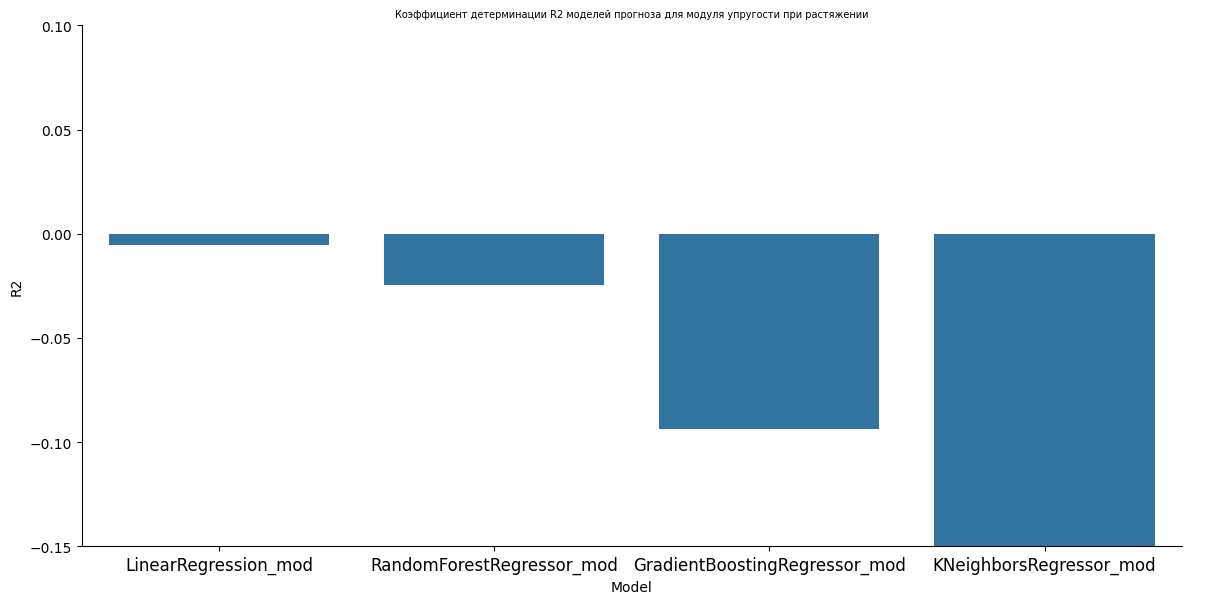

In [68]:
sns.catplot(data=models_s[0:4], x='Model', y='R2', kind='bar', height=6, aspect=2)
plt.ylim(ymin=-0.15, ymax=0.1)
plt.xticks(size=12)
plt.title('Коэффициент детерминации R2 моделей прогноза для модуля упругости при растяжении', size=7)

Text(0.5, 1.0, 'Коэффициент детерминации R2 моделей прогноза для модуля упругости при растяжении')

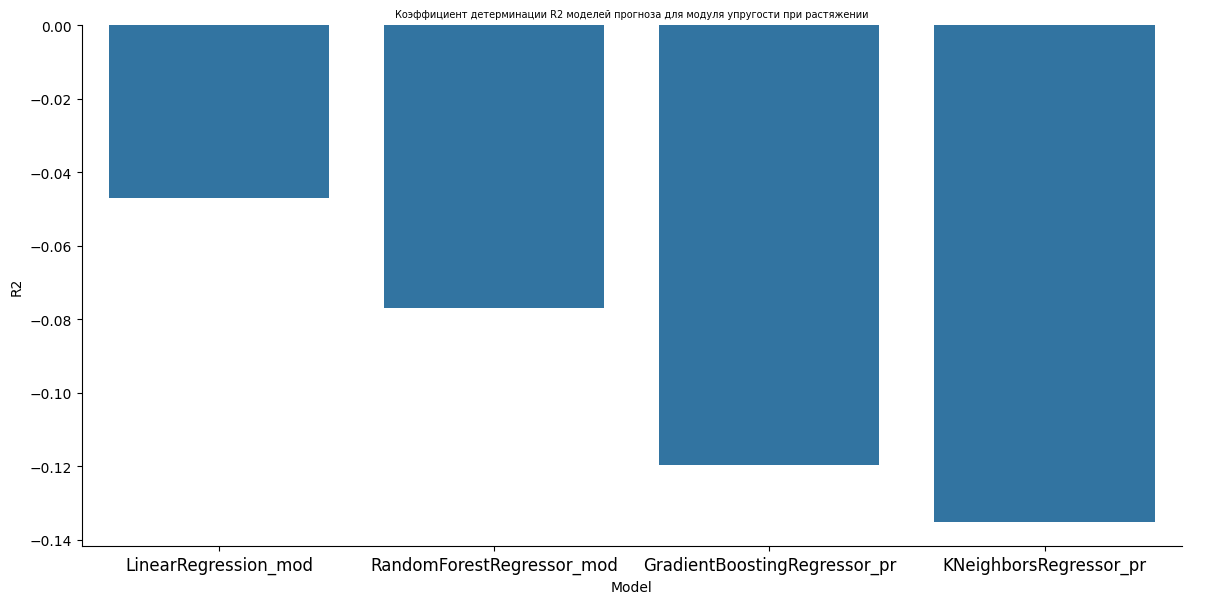

In [69]:
sns.catplot(data=models_s[4:9], x='Model', y='R2', kind='bar', height=6, aspect=2)
plt.xticks(size=12)
plt.title('Коэффициент детерминации R2 моделей прогноза для модуля упругости при растяжении', size=7)

Text(0.5, 1.0, 'Средняя квадратичная ошибка RMSE моделей прогноза для модуля упругости при растяжении')

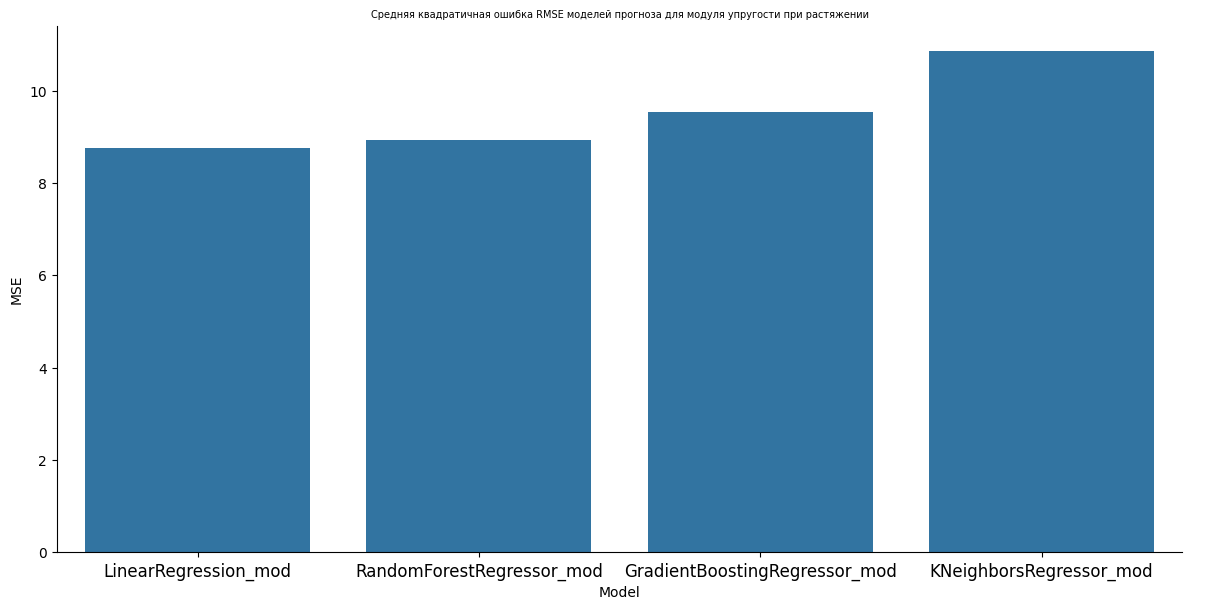

In [70]:
sns.catplot(data=models_s[0:4], x='Model', y='MSE', kind='bar', height=6, aspect=2)
plt.xticks(size=12)
plt.title('Средняя квадратичная ошибка RMSE моделей прогноза для модуля упругости при растяжении', size=7)

Text(0.5, 1.0, 'Средняя квадратичная ошибка RMSE моделей прогноза для модуля упругости при растяжении')

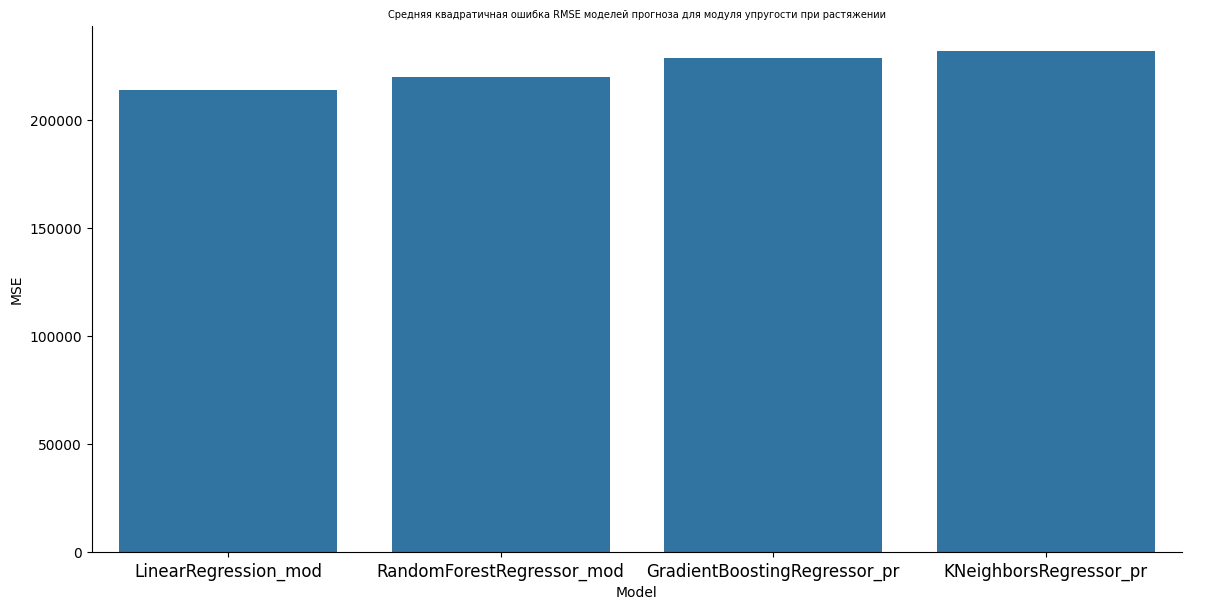

In [71]:
sns.catplot(data=models_s[4:9], x='Model', y='MSE', kind='bar', height=6, aspect=2)
plt.xticks(size=12)
plt.title('Средняя квадратичная ошибка RMSE моделей прогноза для модуля упругости при растяжении', size=7)

Судя по полученым данным наши модели не подходят для предсказания.

# **Пишем нейронную сеть на Keras.tensorflow для рекомендаций соотношение матрица-наполнитель**

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, utils, layers
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
import tensorflow.python.keras.optimizers

In [73]:
#разбиваем данные
x = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y = df[['Соотношение матрица-наполнитель']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
normalizer = tf.keras.layers.Normalization(axis=-1)
X_train_norm = normalizer.adapt(np.array(X_train))

# **Нейронная сеть**

In [74]:
model = Sequential(X_train_norm)
model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(128, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='selu'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.add(Activation('selu'))

model.compile(loss = 'mean_absolute_error', optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = model.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_data = (X_train, y_train), verbose = 1, validation_split = 0.2)


Epoch 1/200
21/21 [==============================] - 3s 24ms/step - loss: 2.5277 - val_loss: 4.5562
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 2.0591 - val_loss: 4.6269
Epoch 3/200
21/21 [==============================] - 0s 7ms/step - loss: 1.9256 - val_loss: 4.5400
Epoch 4/200
21/21 [==============================] - 0s 7ms/step - loss: 1.7505 - val_loss: 4.5040
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 1.6106 - val_loss: 4.0917
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 1.4620 - val_loss: 2.3714
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 1.1971 - val_loss: 1.0709
Epoch 8/200
21/21 [==============================] - 0s 8ms/step - loss: 0.8633 - val_loss: 0.8295
Epoch 9/200
21/21 [==============================] - 0s 7ms/step - loss: 0.7567 - val_loss: 1.3087
Epoch 10/200
21/21 [==============================] - 0s 7ms/step - loss: 0.7430 - val_loss: 0.7875
Epoch 11

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8

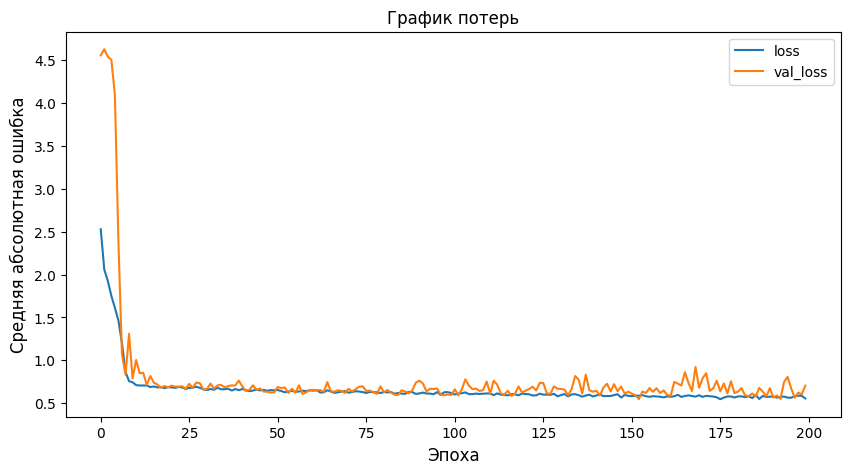

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь', size=12)
plt.ylabel('Средняя абсолютная ошибка', size=12)
plt.xlabel('Эпоха', size=12)
plt.legend(['loss', 'val_loss'], loc='best')
plt.show()

9/9 [==============================] - 0s 3ms/step


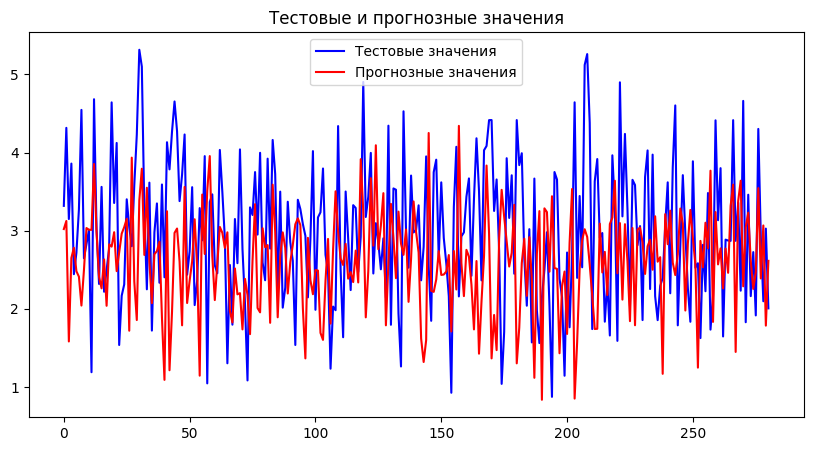

In [77]:
y_pred=model.predict(np.array(X_test))

plt.figure(figsize=(10,5))
plt.title('Тестовые и прогнозные значения', size=12)
plt.plot(y_test.values, color='blue', label = 'Тестовые значения')
plt.plot(y_pred, color='red', label = 'Прогнозные значения')
plt.legend(loc='best')
plt.show()

In [78]:
mae_n = mean_absolute_error(y_test, y_pred)
print('MAE:',mae_n)

MAE: 0.9578473004030068
